Importing Libraries

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Airline Dataset/Airline Dataset.csv')

In [ ]:
df.head(5)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  int64 
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(2), object(13)
memory usage

In [ ]:
df.shape

(98619, 15)

In [ ]:
df.describe(include='all') #for both int+object

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
count,98619.000000,98619,98619,98619,98619.000000,98619,98619,98619,98619,98619,98619,98619,98619,98619,98619
unique,NaN,8437,41658,2,NaN,240,9062,235,235,6,6,364,9024,98610,3
top,NaN,Gale,Dyball,Male,NaN,China,San Pedro Airport,US,United States,NAM,North America,7/22/2022,0,Perry Burhouse,Cancelled
freq,NaN,37,17,49598,NaN,18317,43,22104,22104,32033,32033,325,873,2,32942
mean,55168.689522,NaN,NaN,NaN,45.504021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,25985.443696,NaN,NaN,NaN,25.929849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10000.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,32608.000000,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,55338.000000,NaN,NaN,NaN,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,77695.000000,NaN,NaN,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Flight Status'].value_counts()

,count
Flight Status,
Cancelled,32942
On Time,32846
Delayed,32831


Age Distribution

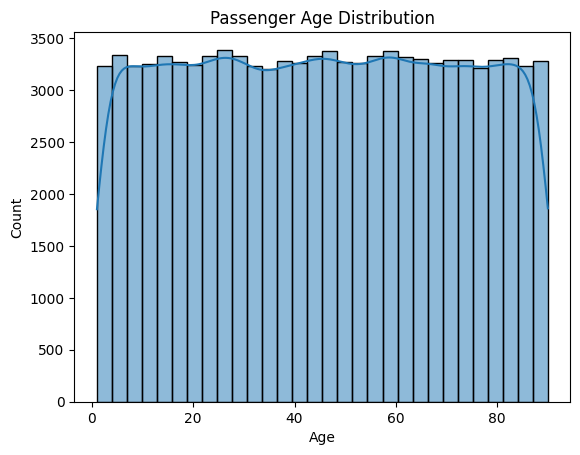

In [ ]:
sns.histplot(df['Age'],bins=30,kde=True)
plt.title('Passenger Age Distribution')
plt.show()

Flight status by continent:

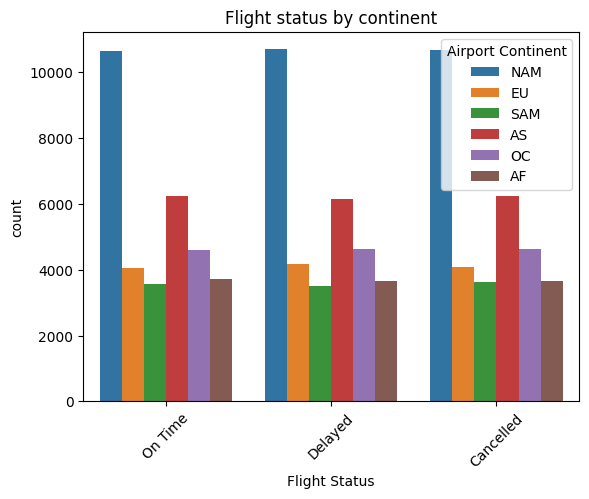

In [ ]:
sns.countplot(data=df,x='Flight Status',hue='Airport Continent')
plt.title('Flight status by continent')
plt.xticks(rotation=45)
plt.show()

Date conversion: If you want to work with Departure Date as a datetime:

In [ ]:
df['Departure Date']=pd.to_datetime(df['Departure Date'])

In [ ]:
flight_status_by_date = df.groupby(['Departure Date', 'Flight Status']).size().unstack(fill_value=0)
print(flight_status_by_date.head())

Flight Status   Cancelled  Delayed  On Time
Departure Date                             
2022-01-01             91       92       84
2022-01-02             85       89       75
2022-01-03             96       74       82
2022-01-04             88       91       88
2022-01-05             94       96       81


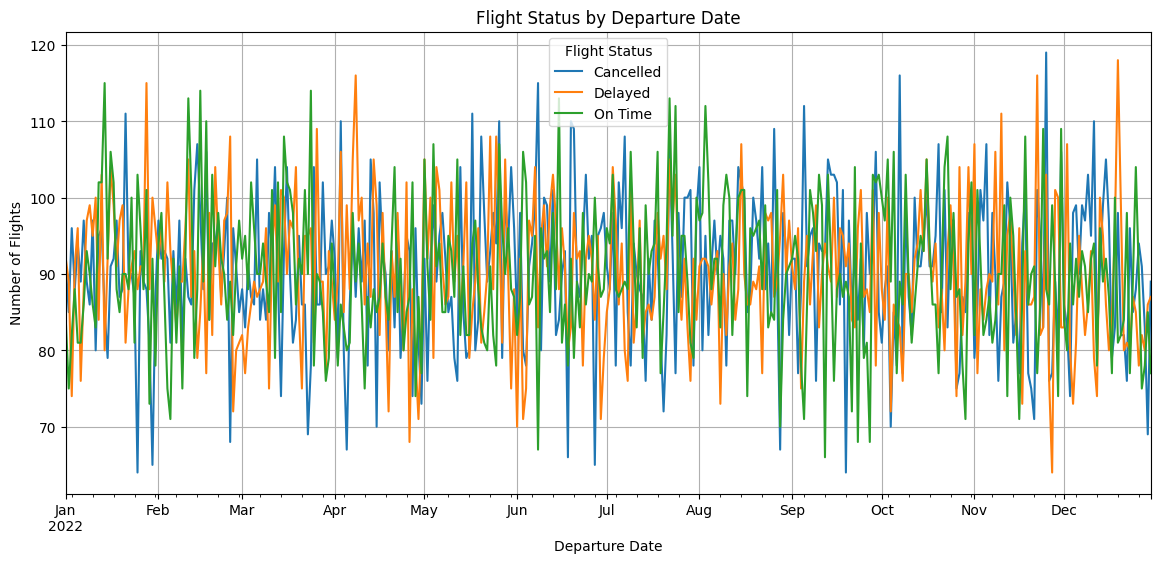

In [ ]:
flight_status_by_date.plot(kind='line', figsize=(14, 6))
plt.title('Flight Status by Departure Date')
plt.xlabel('Departure Date')
plt.ylabel('Number of Flights')
plt.legend(title='Flight Status')
plt.grid(True)
plt.show()


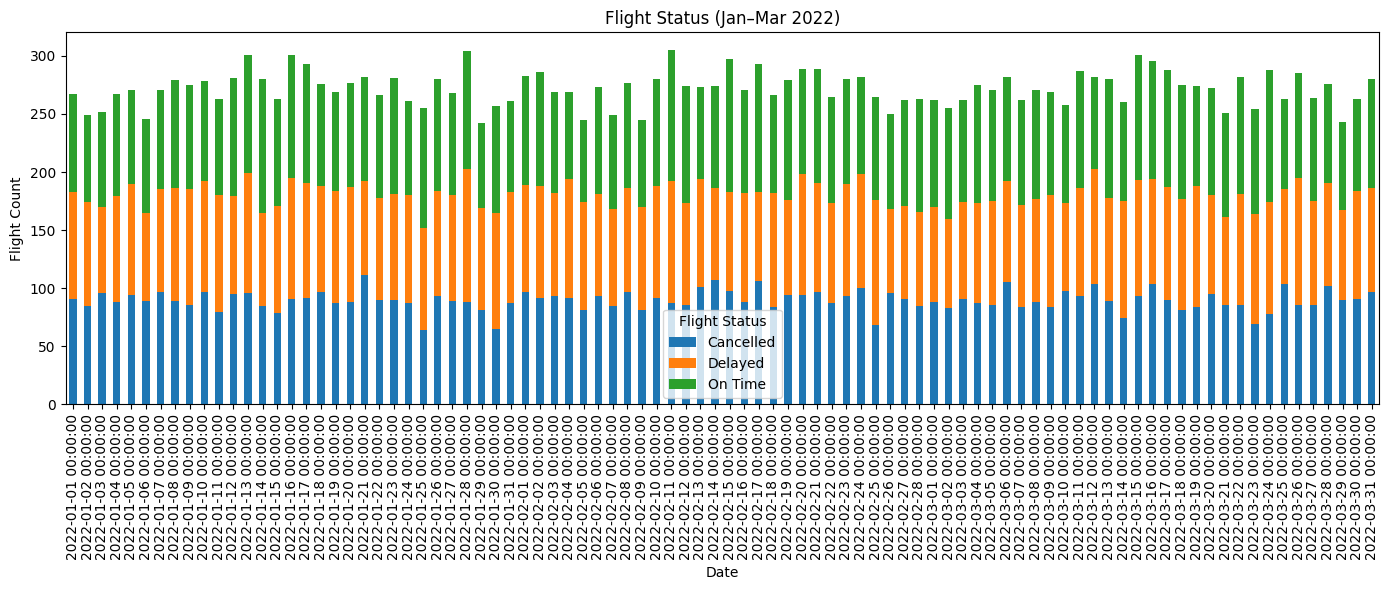

In [ ]:
# Example: Filter from January 2022 to March 2022
mask = (df['Departure Date'] >= '2022-01-01') & (df['Departure Date'] <= '2022-03-31')
df_filtered = df[mask]

status_by_date = df_filtered.groupby(['Departure Date', 'Flight Status']).size().unstack(fill_value=0)
status_by_date.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Flight Status (Jan–Mar 2022)')
plt.xlabel('Date')
plt.ylabel('Flight Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
df.isnull().sum()

,0
Passenger ID,0
First Name,0
Last Name,0
Gender,0
Age,0
Nationality,0
Airport Name,0
Airport Country Code,0
Country Name,0
Airport Continent,0


In [ ]:
df.duplicated().sum()

np.int64(0)

Gender Count

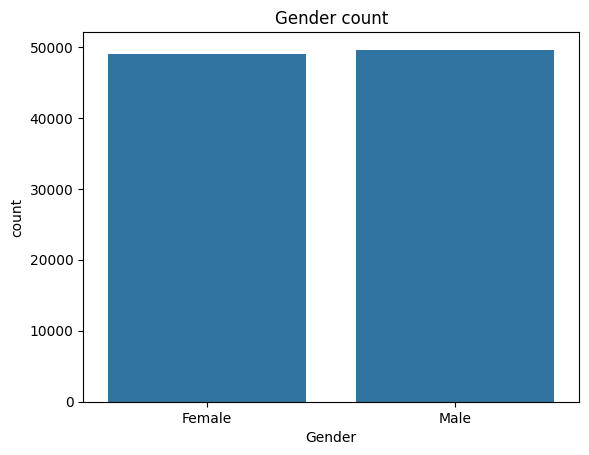

In [ ]:
sns.countplot(data=df,x='Gender')
plt.title('Gender count')
plt.show()

Nationality (Top 10):

In [ ]:
df['Nationality'].value_counts().head(10)

,count
Nationality,
China,18317
Indonesia,10559
Russia,5693
Philippines,5239
Brazil,3791
Portugal,3299
Poland,3245
France,2907
Sweden,2397


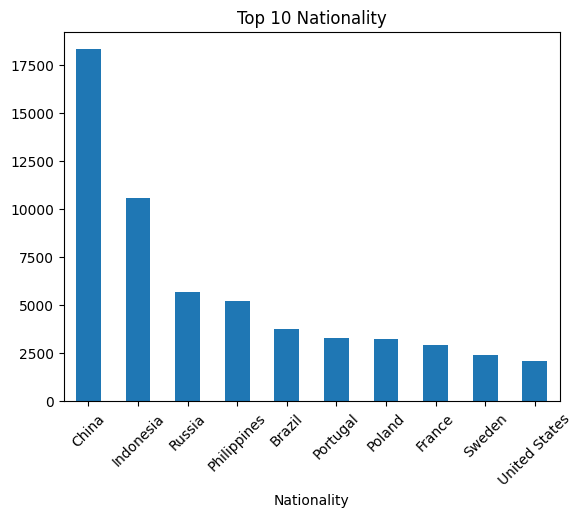

In [ ]:
df['Nationality'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Nationality')
plt.xticks(rotation=45)
plt.show()

Age vs Flight Status:

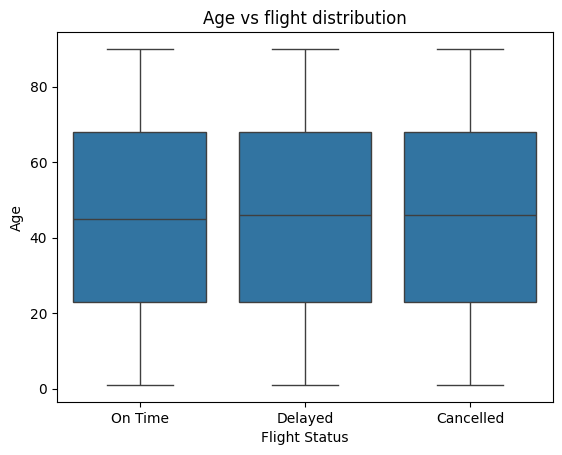

In [ ]:
sns.boxplot(data=df,x='Flight Status',y='Age')
plt.title('Age vs flight distribution')
plt.show()

Gender vs Flight Status:

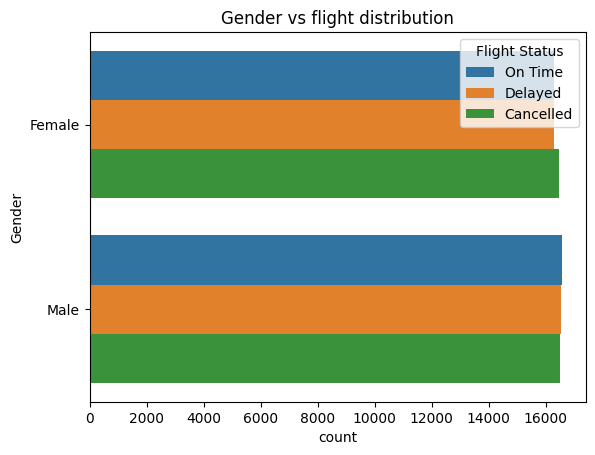

In [ ]:
sns.countplot(data=df,hue='Flight Status',y='Gender')
plt.title('Gender vs flight distribution')
plt.show()

Correlation(Numeric

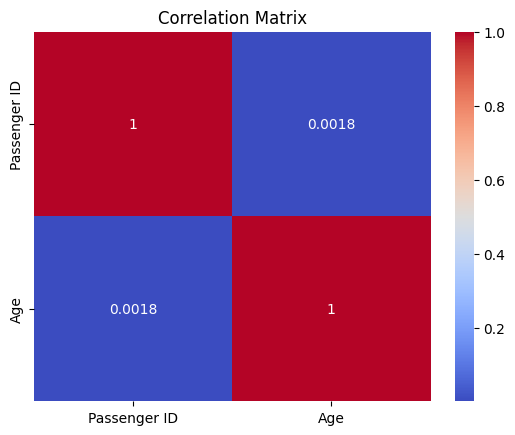

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Flights per month:

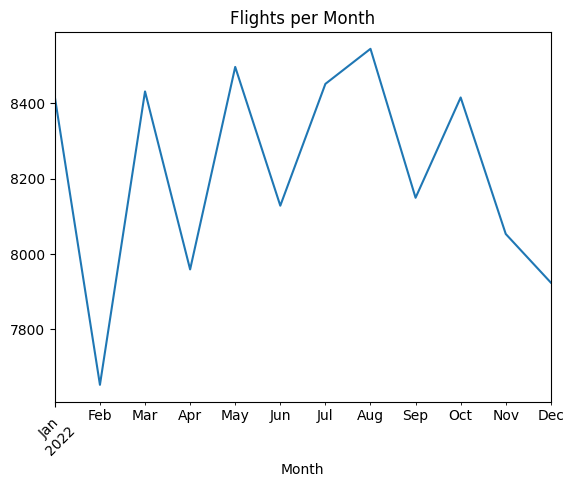

In [ ]:
df['Month'] = df['Departure Date'].dt.to_period('M')
df['Month'].value_counts().sort_index().plot(kind='line')
plt.title('Flights per Month')
plt.xticks(rotation=45)
plt.show()

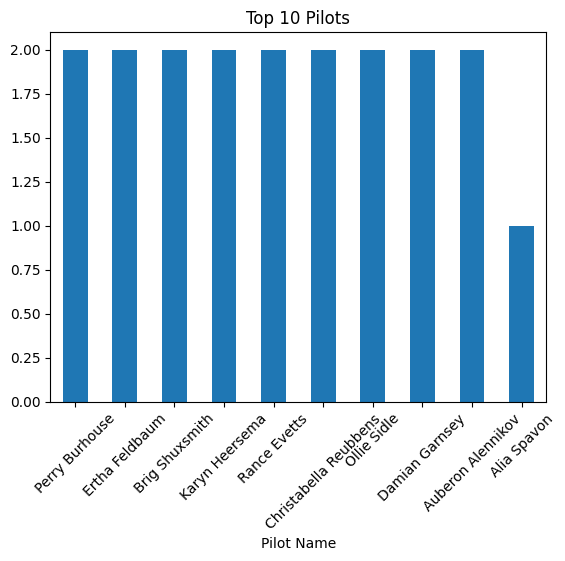

In [ ]:
df['Pilot Name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Pilots')
plt.xticks(rotation=45)
plt.show()